In [ ]:
%matplotlib inline

In [ ]:
1 Задание 

Среднее: 1.1173333333333333
Дисперсия: 0.8571852839835499
Мода: 1
Медиана: 1.0
Квантиль 0.25: 0.0
Квантиль 0.5: 1.0
Квантиль 0.75: 2.0
Эксцесс: -0.2647777897751924
Асимметрия: 0.5245558349207675
Интерквартильный размах: 2.0


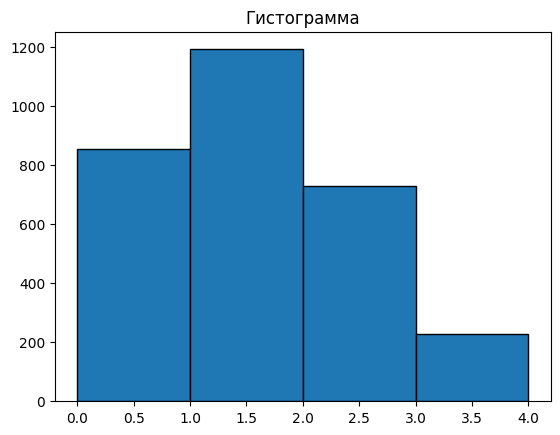

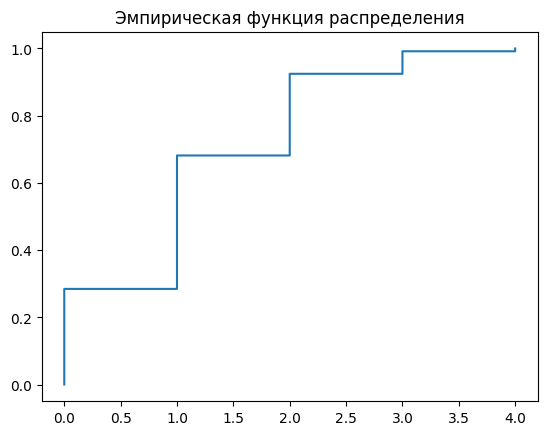

In [9]:
#%% 1. Статистика и графики
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

N = 5
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed',
        'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']

df = pd.read_csv("teen_phone_addiction_dataset.csv")
column = cols[N % 7]
col = df[column]

col = col.astype(str).str.extract(r'(\d+)').dropna().astype(int)[0]

mean = col.mean()
var = col.var()
mode = col.mode()[0]
median = col.median()
q25 = col.quantile(0.25)
q50 = col.quantile(0.5)
q75 = col.quantile(0.75)
kurt = kurtosis(col)
sk = skew(col)
iqr = q75 - q25

print("Среднее:", mean)
print("Дисперсия:", var)
print("Мода:", mode)
print("Медиана:", median)
print("Квантиль 0.25:", q25)
print("Квантиль 0.5:", q50)
print("Квантиль 0.75:", q75)
print("Эксцесс:", kurt)
print("Асимметрия:", sk)
print("Интерквартильный размах:", iqr)

plt.hist(col, bins='auto', edgecolor='black')
plt.title("Гистограмма")
plt.show()

col_sorted = np.sort(col)
y_vals = np.arange(1, len(col_sorted)+1) / len(col_sorted)
plt.step(col_sorted, y_vals, where="post")
plt.title("Эмпирическая функция распределения")
plt.show()


# Статистические характеристики

**Среднее (x̄)**  
x̄ = (1/N) * Σ xi  
Средний уровень значений.

**Дисперсия (D)**  
D = (1/N) * Σ (xi - x̄)²  
Разброс значений относительно среднего.

**Мода (Mo)**  
Mo = значение с максимальной частотой  
Наиболее часто встречающееся значение.

**Медиана (Me)**  
Me = середина упорядоченного ряда  
Делит выборку на две равные части.

**Квантили (Qp)**  
Qp = значение на позиции p*N в упорядоченных данных  
Q0.25 – нижний квартиль, Q0.5 – медиана, Q0.75 – верхний квартиль.

**Эксцесс (Ex)**  
Ex = ( (1/N) * Σ (xi - x̄)⁴ ) / ( ( (1/N) * Σ (xi - x̄)² )² ) - 3  
Острота распределения (0 у нормального).

**Асимметрия (As)**  
As = ( (1/N) * Σ (xi - x̄)³ ) / ( ( (1/N) * Σ (xi - x̄)² )^(3/2) )  
Симметрия/скошенность распределения.

**Интерквартильный размах (IQR)**  
IQR = Q0.75 - Q0.25  
Ширина «средней половины» данных.


In [ ]:
2 Задание

Хи-квадрат: 4750.545803794308
Асимметрия: 0.5245558349207675
Эксцесс: -0.2647777897751924
Выборка скошена вправо


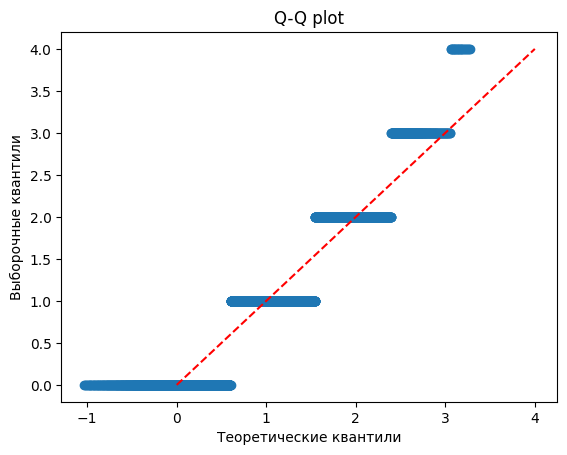

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

df = pd.read_csv("teen_phone_addiction_dataset.csv")
col = df[cols[N % 7]]
col = col.astype(str).str.extract(r'(\d+)').dropna().astype(int)[0]

N_len = len(col)
bins = np.arange(col.min()-0.5, col.max()+1.5, 1)
hist, edges = np.histogram(col, bins=bins)
expected = N_len * (norm.cdf(edges[1:]) - norm.cdf(edges[:-1]))
mask = expected > 0
chi2 = np.sum((hist[mask] - expected[mask])**2 / expected[mask])
print("Хи-квадрат:", chi2)

asym = skew(col)
excess = kurtosis(col)
print("Асимметрия:", asym)
print("Эксцесс:", excess)

if asym > 0.1:
    print("Выборка скошена вправо")
elif asym < -0.1:
    print("Выборка скошена влево")
else:
    print("Выборка почти симметрична")

col_sorted = np.sort(col)
theoretical_quantiles = norm.ppf(np.linspace(0.01, 0.99, N_len), loc=col.mean(), scale=col.std())
plt.scatter(theoretical_quantiles, col_sorted)
plt.plot([col.min(), col.max()], [col.min(), col.max()], 'r--')
plt.xlabel("Теоретические квантили")
plt.ylabel("Выборочные квантили")
plt.title("Q-Q plot")
plt.show()


In [ ]:
Асимметрия ≈ -0.0006 → распределение почти симметричное, с лёгким смещением влево (очень близко к 0).

Эксцесс = -1.27 → распределение более плоское, чем нормальное (менее «пиковое»).

In [ ]:
3 задание 


--- Оригинальные данные ---
Количество элементов: 3000
Среднее: 1.1173333333333333
Дисперсия: 0.8571852839835499
Мода: 1
Медиана: 1.0
Квартиль 0.25: 0.0
Квартиль 0.5: 1.0
Квартиль 0.75: 2.0
Асимметрия: 0.5245558349207675
Эксцесс: -0.2647777897751924
Хи-квадрат: 4750.545803794308
Распределение далеки от нормального


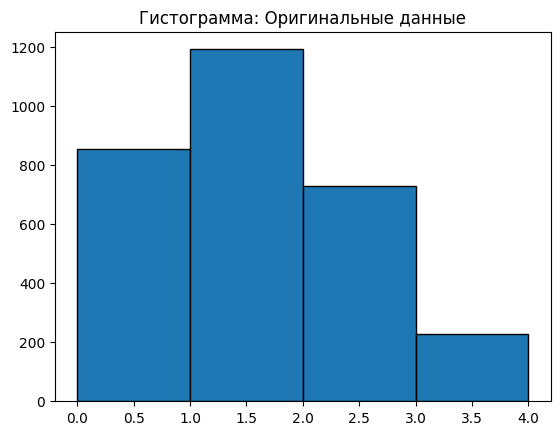

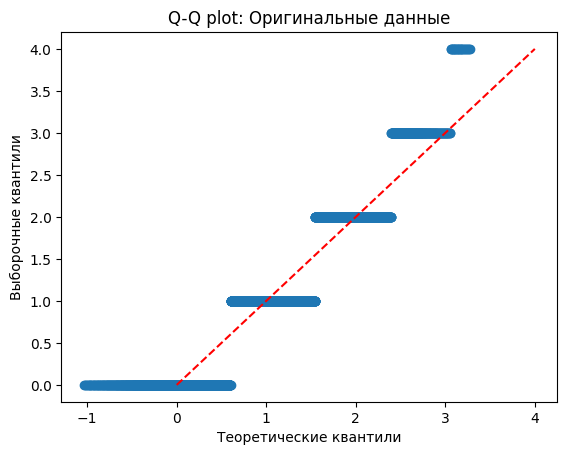


--- Усечённые данные ---
Количество элементов: 3000
Среднее: 1.1173333333333333
Дисперсия: 0.8571852839835499
Мода: 1
Медиана: 1.0
Квартиль 0.25: 0.0
Квартиль 0.5: 1.0
Квартиль 0.75: 2.0
Асимметрия: 0.5245558349207675
Эксцесс: -0.2647777897751924
Хи-квадрат: 4750.545803794308
Распределение далеки от нормального


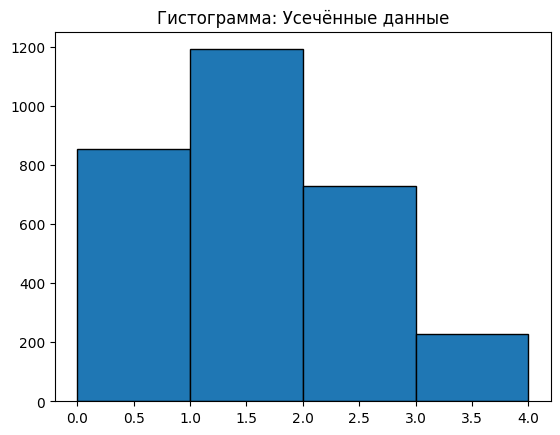

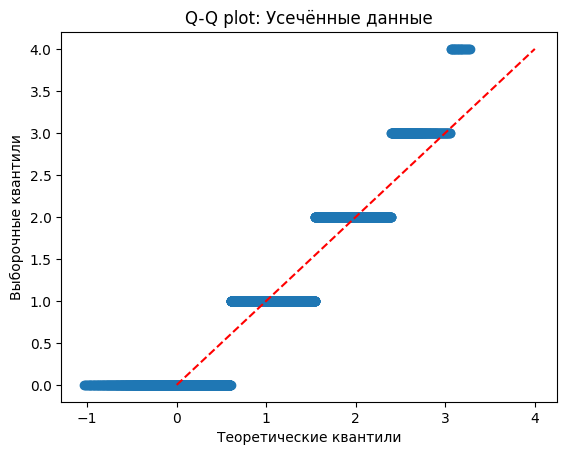


--- Стандартизированные данные ---
Количество элементов: 3000
Среднее: 4.263256414560601e-17
Дисперсия: 1.0000000000000002
Мода: -0.12673134833475225
Медиана: -0.12673134833475225
Квартиль 0.25: -1.2068280670968456
Квартиль 0.5: -0.12673134833475225
Квартиль 0.75: 0.9533653704273412
Асимметрия: 0.5245558349207673
Эксцесс: -0.2647777897751933
Хи-квадрат: 160.91764280981994
Распределение далеки от нормального


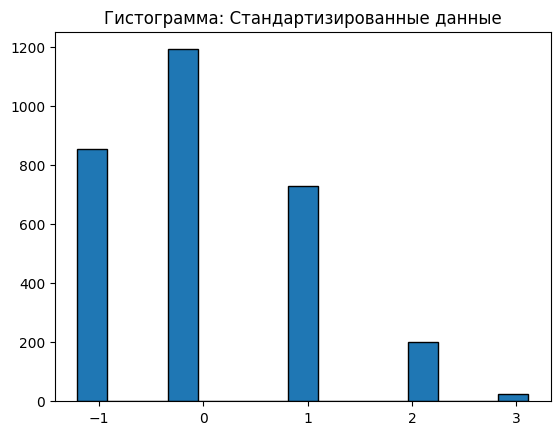

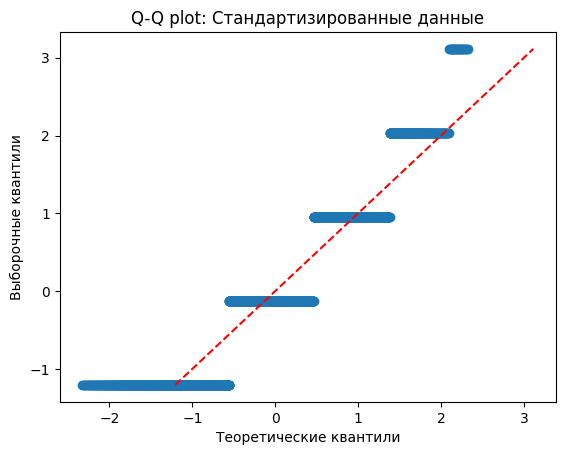


--- Логарифмированные данные ---
Количество элементов: 3000
Среднее: 0.6484359216272991
Дисперсия: 0.21397778648841462
Мода: 0.6931471805599453
Медиана: 0.6931471805599453
Квартиль 0.25: 0.0
Квартиль 0.5: 0.6931471805599453
Квартиль 0.75: 1.0986122886681098
Асимметрия: -0.2132561158260185
Эксцесс: -1.092574645721746
Хи-квадрат: 2897.448285511816
Распределение далеки от нормального


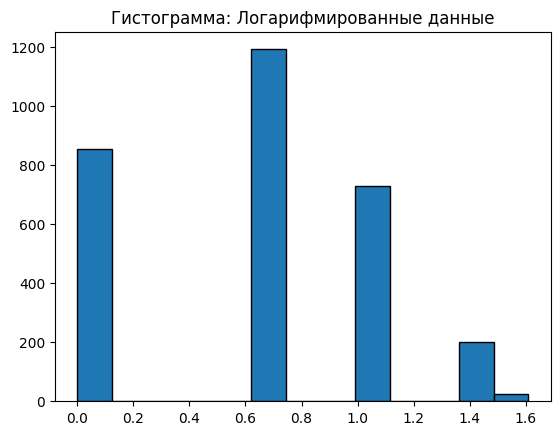

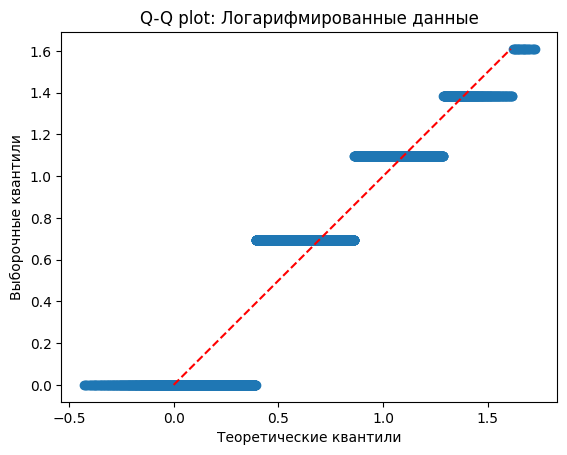

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, norm

df = pd.read_csv("teen_phone_addiction_dataset.csv")
col = df[cols[N % 7]]
col = col.astype(str).str.extract(r'(\d+)').dropna().astype(int)[0]
col_orig = col.copy()

Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
col_trimmed = col[(col >= lower) & (col <= upper)]

col_std = (col_trimmed - col_trimmed.mean()) / col_trimmed.std()

col_log = np.log1p(col_trimmed)

def analyze_data(data, label="Данные"):
    N_len = len(data)
    mean = data.mean()
    var = data.var()
    mode = data.mode()[0]
    median = data.median()
    q25 = data.quantile(0.25)
    q50 = data.quantile(0.5)
    q75 = data.quantile(0.75)
    asym = skew(data)
    ex = kurtosis(data)

    bins = np.arange(data.min()-0.5, data.max()+1.5, 1)
    hist, edges = np.histogram(data, bins=bins)
    expected = N_len * (norm.cdf(edges[1:]) - norm.cdf(edges[:-1]))
    mask = expected > 0
    chi2 = np.sum((hist[mask]-expected[mask])**2/expected[mask])

    print(f"\n--- {label} ---")
    print("Количество элементов:", N_len)
    print("Среднее:", mean)
    print("Дисперсия:", var)
    print("Мода:", mode)
    print("Медиана:", median)
    print("Квартиль 0.25:", q25)
    print("Квартиль 0.5:", q50)
    print("Квартиль 0.75:", q75)
    print("Асимметрия:", asym)
    print("Эксцесс:", ex)
    print("Хи-квадрат:", chi2)

    if abs(asym)<0.5 and abs(ex)<1:
        print("Распределение близко к нормальному")
    else:
        print("Распределение далеки от нормального")

    plt.hist(data, bins='auto', edgecolor='black')
    plt.title(f"Гистограмма: {label}")
    plt.show()

    data_sorted = np.sort(data)
    theoretical_quantiles = norm.ppf(np.linspace(0.01,0.99,N_len), loc=data.mean(), scale=data.std())
    plt.scatter(theoretical_quantiles, data_sorted)
    plt.plot([data.min(), data.max()], [data.min(), data.max()], 'r--')
    plt.xlabel("Теоретические квантили")
    plt.ylabel("Выборочные квантили")
    plt.title(f"Q-Q plot: {label}")
    plt.show()

analyze_data(col_orig, "Оригинальные данные")
analyze_data(col_trimmed, "Усечённые данные")
analyze_data(col_std, "Стандартизированные данные")
analyze_data(col_log, "Логарифмированные данные")


In [7]:
Изначально распределение не нормально: высокий Хи-квадрат и заметная асимметрия 
т е  значения около нижних границ с иногода с высокими значениями.
Усечение выбросов почти ничего не меняло, тк  экстремальных значений практически нет, 
и даже самые большие числа мало влияют на респред.
Стандартизация изменила масштаб и смещение данных, но сама форма распределения осталась почти такой же так что 
данные всё ещё далеки от нормальных.
Логарифмирование немного уменьшило асимметрию и сгладило распределение, но значительные отклонения от нормального 
вида такие же, так как исходные данные не сильно распологают к нормальному распреду.
Итог: привести эти данные к идеальному нормальному распределению не удалось. 
Методы трансформации лишь слегка сглаживают асимметрию и эксцесс, но на общую форму данных не влияет.

SyntaxError: invalid character '—' (U+2014) (1158506314.py, line 5)

In [ ]:
4 задание 

10th: Среднее = 1.45, Дисперсия = 0.86
11th: Среднее = 1.51, Дисперсия = 0.79
12th: Среднее = 1.52, Дисперсия = 0.94
7th: Среднее = 1.55, Дисперсия = 0.78
8th: Среднее = 1.54, Дисперсия = 0.96
9th: Среднее = 1.57, Дисперсия = 0.88


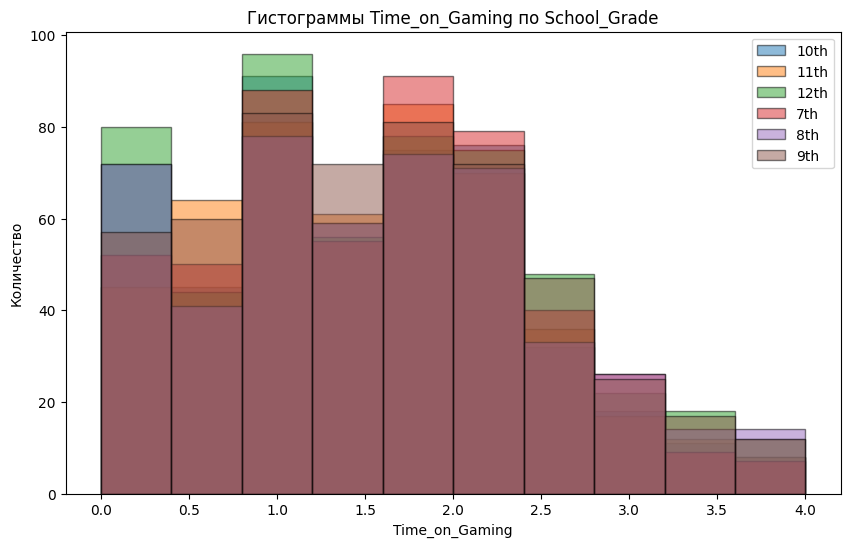

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("teen_phone_addiction_dataset.csv")

grades = df['School_Grade'].astype(str)

data_column = df['Time_on_Gaming']

unique_grades = sorted(grades.unique())

stats = {}
for grade in unique_grades:
    group = data_column[grades == grade]
    mean = group.mean()
    var = group.var()
    stats[grade] = (mean, var)
    print(f"{grade}: Среднее = {mean:.2f}, Дисперсия = {var:.2f}")

plt.figure(figsize=(10,6))
for grade in unique_grades:
    group = data_column[grades == grade]
    plt.hist(group, bins=10, alpha=0.5, label=f'{grade}', edgecolor='black')
plt.xlabel('Time_on_Gaming')
plt.ylabel('Количество')
plt.title('Гистограммы Time_on_Gaming по School_Grade')
plt.legend()
plt.show()


In [ ]:
5 задание 

In [ ]:
Среднее время, проведённое за играми, 
почти одинаково во всех классах разброс от 1.45 до 1.57,
и разброс внутри групп невелик от 0.78 до 0.96. Распределения схожи, 
существенных различий между классами нет.